In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import csv
import easyocr
from nltk.translate.bleu_score import sentence_bleu
import random
import os
import subprocess
import glob
import json
from natsort import natsorted
import requests
import base64
import shutil
import time


In [4]:
def findContours(form_image):
    form_image_gray = cv2.cvtColor(form_image, cv2.COLOR_RGB2GRAY)
    binary = form_image_gray


    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)




    return contours

In [5]:
def createCombination(listPoints):
    combinations = []
    for i in range(len(listPoints)):
        combination = np.concatenate((listPoints[i:], listPoints[:i]), axis = 0)
        combinations.append(combination)

    return combinations

In [6]:
def getMaxContour(form_image, contours):
    # Initialize variables to keep track of the largest contour and its area
    largest_contour = None
    max_area = 0

    # Iterate through the contours to find the largest one
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > max_area:
            max_area = area
            largest_contour = contour
    if largest_contour is not None:
    # Create an image with only the largest contour
        largest_contour_image = form_image.copy()
        rotated_rect = cv2.minAreaRect(largest_contour)

        epsilon = 0.04 * cv2.arcLength(largest_contour, True)
        approx_polygon = cv2.approxPolyDP(largest_contour, epsilon, True)

    

        x, y, w, h = cv2.boundingRect(approx_polygon)
        largest_contour_image = form_image.copy()
        box = cv2.boxPoints(rotated_rect)
        box = np.intp(box)
        cv2.drawContours(largest_contour_image, [box], 0, (0, 255, 0), 2)

        # cv2.drawContours(largest_contour_image, [largest_contour], -1, (0, 255, 0), 2)
    # cv2.rectangle(largest_contour_image, (x, y), (x + w, y + h), (0, 255, 0), 2)


    # Display the result
        plt.figure(figsize = [20,10])
        plt.title("Maximum Contour")
        plt.imshow(largest_contour_image)
        plt.axis("off")

        plt.savefig("E:/OCR-PORTAL/Version-1/masked_output/masked_with_contour.png")
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    else:
        print("No contours found in the binary image")
    return largest_contour

In [7]:
def detectMaxContour(input_image_path,saved_masked_image_dir):
    largest_contour = None
    max_area = 0
    input_image_name = os.path.basename(input_image_path).split(".")[0]
    masked_image_name = input_image_name + "_masked"+ ".png"
    masked_image_directory = os.path.join(saved_masked_image_dir, masked_image_name)
    print(masked_image_directory)


    masked_image = cv2.imread(masked_image_directory)
    masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
    print(masked_image.shape)

    contours, _ = cv2.findContours(masked_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > max_area:
            
            max_area = area
            largest_contour = contour

    return largest_contour

In [10]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

def detect_text_contours(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Preprocess the image
    # Apply GaussianBlur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply edge detection
    edges = cv2.Canny(blurred, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw bounding boxes around detected contours
    for contour in contours:
        # Get the bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)
        
        # Draw the bounding box on the original image
        if w > 10:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()




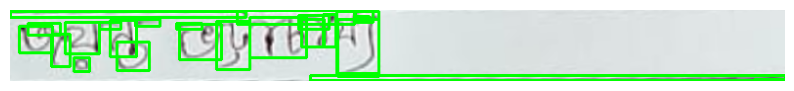

In [11]:
# Provide the path to your image
image_path = 'E:/OCR-PORTAL/cropped_images/Bengali_Form/val_2/1.png'
detect_text_contours(image_path)

In [8]:
def backgroundRemoval(input_image_path, saved_masked_image_dir):
    input_image = cv2.imread(input_image_path)

    # form_name = os.path.dirname(input_image_path).split("/")[-1]
    if input_image.shape[1] >=2000 or input_image.shape[0] >= 2000:
        print(f"The width and height of the image is :{input_image.shape[1]},{input_image.shape[0]}")

        print("we need to resize")

        input_image = cv2.resize(input_image, (input_image.shape[1]//2, input_image.shape[0]//2))
        cv2.imwrite(input_image_path, input_image)

    os.makedirs(saved_masked_image_dir, exist_ok= True)
    # saved_masked_image_dir = os.path.join(saved_masked_image_dir, form_name)

    python_command_backremoval = f"python U-2-Net/u2net_test.py --input_image {input_image_path} --saved_output {saved_masked_image_dir}"

    subprocess.call(python_command_backremoval, shell = True)

In [ ]:
input_image_path = "E:/OCR-PORTAL/Version-1/test_images/WhatsApp Image 2024-05-22 at 12.18.55.jpeg"


In [30]:
input_image_path = "E:/OCR-PORTAL/hindi_form_images/new_users/user_3/hindi_2/20240615233550.jpg"
saved_masked_output = "E:/OCR-PORTAL/Version-1/masked_output"

backgroundRemoval(input_image_path, saved_masked_output)

array([[[1028,    0]],

       [[1028,    1]],

       [[1027,    2]],

       [[1008,    2]],

       [[1008,    3]],

       [[1007,    4]],

       [[ 980,    4]],

       [[ 980,    5]],

       [[ 979,    6]],

       [[ 960,    6]],

       [[ 959,    7]],

       [[ 952,    7]],

       [[ 951,    8]],

       [[ 936,    8]],

       [[ 935,    9]],

       [[ 928,    9]],

       [[ 927,   10]],

       [[ 908,   10]],

       [[ 907,   11]],

       [[ 888,   11]],

       [[ 887,   12]],

       [[ 881,   12]],

       [[ 880,   13]],

       [[ 856,   13]],

       [[ 856,   14]],

       [[ 855,   15]],

       [[ 828,   15]],

       [[ 827,   16]],

       [[ 824,   16]],

       [[ 823,   17]],

       [[ 800,   17]],

       [[ 799,   18]],

       [[ 792,   18]],

       [[ 791,   19]],

       [[ 775,   19]],

       [[ 774,   20]],

       [[ 760,   20]],

       [[ 759,   21]],

       [[ 747,   21]],

       [[ 746,   22]],

       [[ 724,   22]],

       [[ 724,  

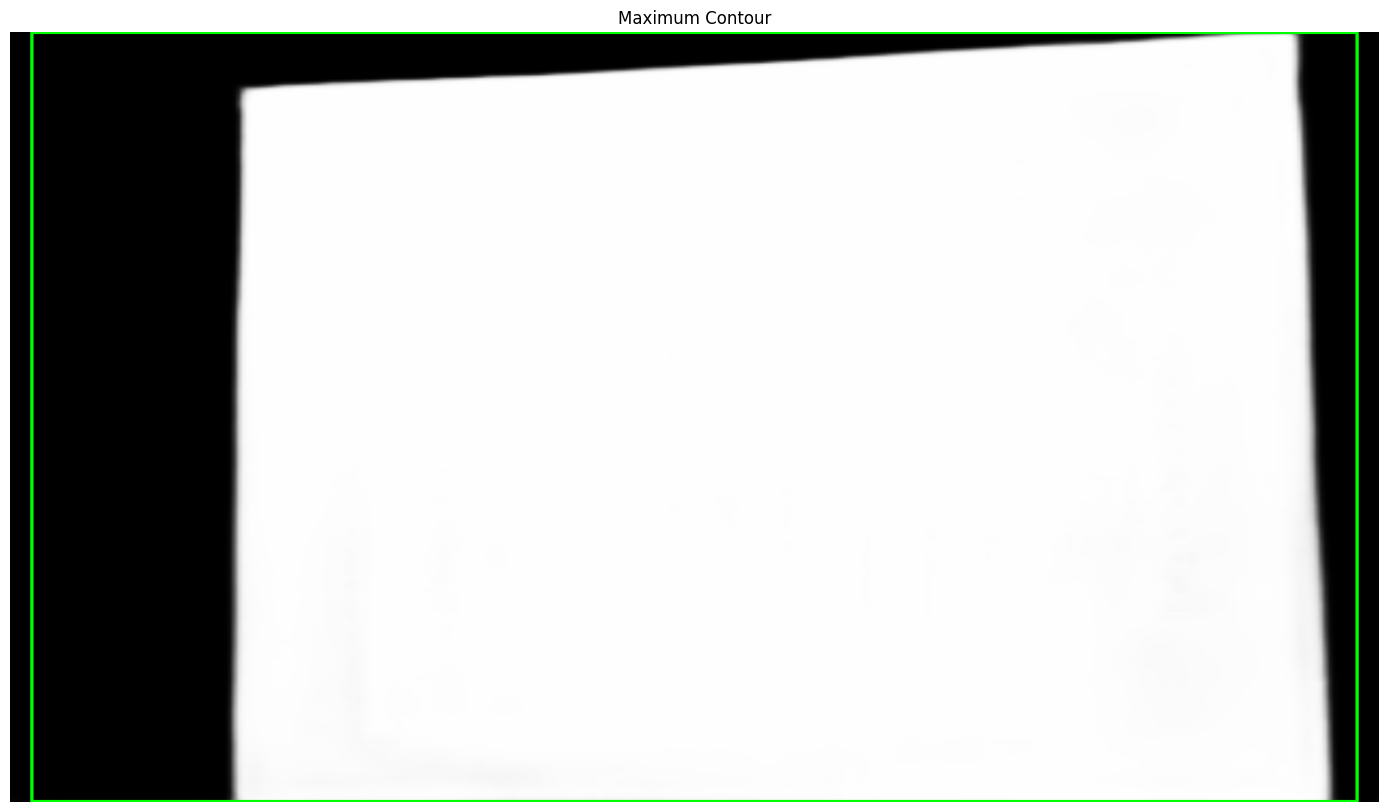

In [32]:
masked_image = cv2.imread("E:/OCR-PORTAL/Version-1/masked_output/20240615233550_masked.png")
contours = findContours(masked_image)
getMaxContour(masked_image, contours)

In [40]:
def getCornerPoints(largest_contour):


    hull = cv2.convexHull(largest_contour)
    
    # epsilon = 0.04 * cv2.arcLength(largest_contour, True)
    # approx_polygon = cv2.approxPolyDP(largest_contour, epsilon, True)

    epsilon = 0.04 * cv2.arcLength(hull, True)
    approx_polygon = cv2.approxPolyDP(hull, epsilon, True)


    corner_points = approx_polygon.reshape(-1, 2)


    desired_points = corner_points.copy()

    desired_points[[1,3]] = desired_points[[3,1]]

    

    print("Hull:",corner_points)

    print("polugon:", desired_points)

    # print(len(corner_points))


    return desired_points

In [41]:
saved_masked_image_dir = "E:/OCR-PORTAL/Version-1/masked_output"
input_image_path = "E:/OCR-PORTAL/hindi_form_images/new_users/user_3/hindi_2/20240615233518.jpg"
# masked_image = cv2.imread("E:/OCR-PORTAL/Version-1/masked_output/20240615233550_masked.png")
# contours = findContours(masked_image)
backgroundRemoval(input_image_path, saved_masked_image_dir)
largest_contour = detectMaxContour(input_image_path,saved_masked_image_dir )

getCornerPoints(largest_contour)

E:/OCR-PORTAL/Version-1/masked_output\20240615233518_masked.png
(720, 1280)
Hull: [[ 307   42]
 [1035  166]
 [ 928  710]
 [ 192  535]]
polugon: [[ 307   42]
 [ 192  535]
 [ 928  710]
 [1035  166]]


array([[ 307,   42],
       [ 192,  535],
       [ 928,  710],
       [1035,  166]], dtype=int32)

[[ 307   42]
 [1035  166]
 [ 928  710]
 [ 192  535]]


 [[ 351   47]
 [ 284  553]
 [1044  654]
 [1095   98]]

 [[ 351   47]
 [1095   98]
 [1044  654]
 [ 284  553]]


 [[1231    0]
 [1259  719]
 [  20  717]
 [ 208   47]]

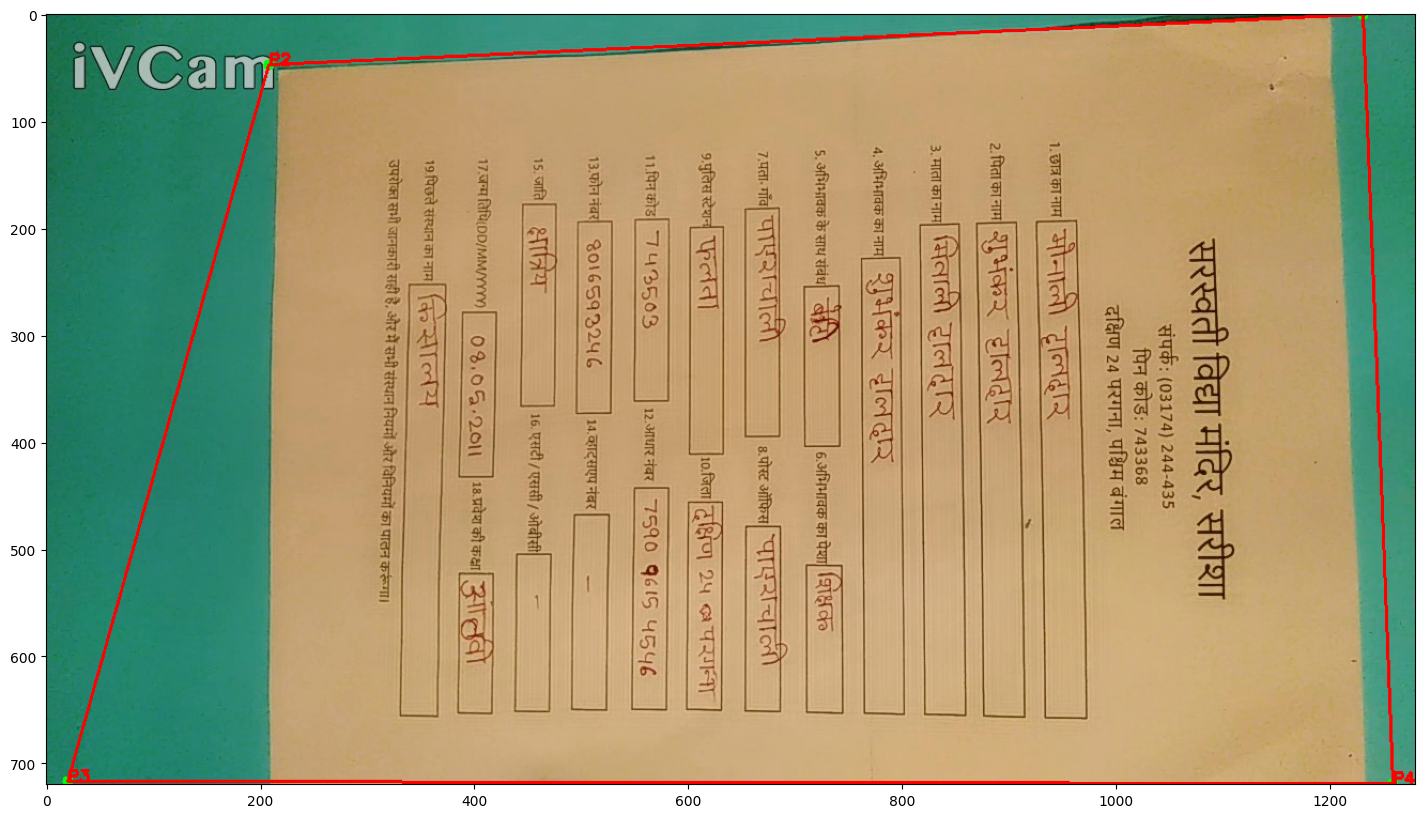

In [37]:
image = cv2.imread('E:/OCR-PORTAL/hindi_form_images/new_users/user_3/hindi_2/20240615233550.jpg')

# Provided corner points hull
corner_points = np.array([[1231, 0],[208, 47], [20, 717],[1259, 719] ])

# Draw the corner points on the image
for i, point in enumerate(corner_points):
    cv2.circle(image, tuple(point), 5, (0, 255, 0), -1)
    cv2.putText(image, f'P{i+1}', tuple(point), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Connect the corner points to visualize the contour
for i in range(len(corner_points)):
    start_point = tuple(corner_points[i])
    end_point = tuple(corner_points[(i + 1) % len(corner_points)])
    cv2.line(image, start_point, end_point, (255, 0, 0), 2)

# Display the image with corners
# cv2.imshow('Image with corners', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize=[20,10])
plt.imshow(image)

In [24]:
def bhashini_ocr(image_paths, ocr_lang, modality = "handwritten", version = "v3"):
    url = "https://ilocr.iiit.ac.in/ocr/infer"
    base64_image = []

    for sample_image in image_paths:

        

        word_image1 = base64.b64encode(open(sample_image, 'rb').read()).decode()

        base64_image.append(word_image1)

    payload = json.dumps({ "modality": modality, 
                          "language": ocr_lang, 
                          "version": version, 
                          "imageContent": base64_image})
    headers = { 'Content-Type': 'application/json'}

    response = requests.post(url, headers=headers, data=payload) 
    ocr_output = response.json()
    print(ocr_output)
    # print(ocr_output[0]["text"])

    return ocr_output

In [3]:
def ocr(image_path,ocr_type = "easy_ocr", lang = "en", text_type = "key"):
    if ocr_type == "easy_ocr" and text_type == "key":
        reader = easyocr.Reader(["en"], gpu = False)

        ocr_result = reader.readtext(image_path)

    elif ocr_type == "easy_ocr" and text_type == "val":
        reader = easyocr.Reader([lang], gpu = False)

        ocr_result = reader.readtext(image_path)

    elif ocr_type == "bhashini" and text_type == "key":
        ocr_result = bhashini_ocr(image_path, lang, "printed", "v4_robust")
        

    return ocr_result

In [4]:
def digitize(image_path,lang ="en", mode= "template"):

    if mode == "template":
        count = 1
        digitized_temp_key = {}
        image_name = os.path.basename(image_path).split(".")[0]
        extracted_images_sub_folder = os.path.join("form_template_info", image_name)

        #reading the extracted images
        extracted_images_folder = os.path.join(extracted_images_sub_folder, "extracted_key_images") 
        print(extracted_images_folder)
        images = glob.glob(os.path.join(extracted_images_folder, "*.png"))
        images = natsorted(images)
        print(len(images))
        print("language for key digitization:", lang)

        for single_img in images:

            if lang == "en":

                result_ocr = ocr(single_img, "easy_ocr", lang, "key" )

                # single_img_name = os.path.basename(single_img).split(".")[0]

                merge_text = ""

                for i in range(len(result_ocr)):

                    info_ocr = result_ocr[i]

                    text = info_ocr[1]
                    merge_text+= text + " "
            else:
                result_ocr = ocr(single_img, "bhashini", lang, "key")
                merge_text = result_ocr

            digitized_temp_key[str(count)] = merge_text
            print(merge_text)
            count += 1

        ocred_key_json_path = os.path.join(extracted_images_sub_folder, "ocred_key.json")


        with open (ocred_key_json_path, "w", encoding = "utf-8") as f:

            json.dump(digitized_temp_key, f,ensure_ascii=False, indent = 4)

        
        

        
    if mode == "form":
        count = 1

        digitized_form_val = {}

        image_name = os.path.basename(image_path).split("_")[0]
        image_name_split = image_name.split("_")
        extracted_image_sub_sub_folder = image_name_split[0] + "_" + image_name_split[1]

        extracted_image_sub_folder = os.path.join("aligned_verion1",extracted_image_sub_sub_folder)

        extracted_image_folder = glob.glob(os.path.join(extracted_image_sub_folder, "val_*"))
        extracted_image_folder = natsorted(extracted_image_folder)

        for single_image_folder in extracted_image_folder:
            folder_name = os.path.basename(single_image_folder)

            cropped_images_single_folder = glob.glob(os.path.join(single_image_folder, "*"))
            for cropped_single_image in cropped_images_single_folder:
                result_ocr = ocr(cropped_single_image, lang = "hi", text_type = "val")

                merge_text = ""

                for i in range(len(result_ocr)):

                    info_ocr = result_ocr[i]

                    text = info_ocr[1]
                    merge_text+= text + " "

                digitized_form_val[str(count)] = merge_text
                count += 1

        return digitized_form_val

In [5]:
def extractBoundingBox(bbox_json_path,image_path, mode = "key", isPlot = "No", isExtract = "Yes"):

    img = cv2.imread(image_path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_copy = img.copy()

    print(img.shape)

    

    with open(bbox_json_path, "r", encoding  = "utf-8" )as f:
        data = json.load(f)

    
    
    count_key = 1

    for i, bbox_data in data.items():
        # print(i)

        if mode == "key":
            
            info_bbox = bbox_data[0]


            if isExtract == "Yes":
        

                for j in range(1,len(info_bbox)):
                    x,y,w,h = info_bbox[j][0], info_bbox[j][1], info_bbox[j][2], info_bbox[j][3]
                    
                    if w and h !=0:
                        single_image = img[y:y+h, x:x+w]
                        image_name = str(count_key) + ".png"

                        processed_image_folder = os.path.basename(image_path).split(".")[0]

                        key_image_saved_subfolder = os.path.join(processed_image_folder, "extracted_key_images")
                        
                        key_image_saved_folder = os.path.join("form_template_info", key_image_saved_subfolder)
                        os.makedirs(key_image_saved_folder, exist_ok=True)

                        single_image_saved_path = os.path.join(key_image_saved_folder, image_name)

                        cv2.imwrite(single_image_saved_path, single_image)

                count_key+=1



            if isPlot == "Yes":

                for j in range (1, len(info_bbox)):
                    x, y, w, h = info_bbox[j][0], info_bbox[j][1], info_bbox[j][2], info_bbox[j][3]

                    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),5)

            reader = easyocr.Reader(["en"], gpu = False)
        elif mode == "val":
            info_bbox = bbox_data[1]
            temporary_folder = "E:/OCR-PORTAL/Version-1/temp"


            if isExtract == "Yes":

                name_val = info_bbox[0]
                # print(name_val)
               
                
                image_name = os.path.basename(image_path).split(".")[0]
                # processed_image_folder = image_folder_split[0] + "_" + image_folder_split[1]
                saved_val_images_subfolder = os.path.join(temporary_folder,image_name)
                saved_val_imagesfolder = os.path.join(saved_val_images_subfolder, name_val)

                

                os.makedirs(saved_val_imagesfolder, exist_ok= True)
                for j in range (1, len(info_bbox)):

                    x,y,w,h = info_bbox[j][0], info_bbox[j][1], info_bbox[j][2], info_bbox[j][3]

                    # print(x, y, w, h)

                    if w and h !=0:
                        single_image = img[y:y+h, x:x+w]
                        # print(single_image.shape)
                        image_name = str(j) + ".png"
                        single_image_saved_path = os.path.join(saved_val_imagesfolder, image_name)

                        cv2.imwrite(single_image_saved_path, single_image)
            
            if isPlot == "Yes":
                for j in range (1, len(info_bbox)):
                    x, y, w, h = info_bbox[j][0], info_bbox[j][1], info_bbox[j][2], info_bbox[j][3]

                    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (0,255,0),5)
            
            image_name = os.path.basename(image_path).split(".")[0]+"_form_with_plotted_bounding_box" + ".png"
            form_bbox_path = os.path.join(temporary_folder, image_name)
            cv2.imwrite(form_bbox_path, img_copy)

  

In [6]:
def modifyLine(bbox_text_file):
    with open(bbox_text_file, "r") as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]

        new_lines = [item for item in lines if item]

    #write the modify lines to a new file
    with open(bbox_text_file, "w") as file:
        file.write("\n".join(new_lines))

In [7]:
def readfile(textfile):
    with open (textfile,"r") as file:
        lines = file.readlines()
        return lines

In [8]:
def checkDistanceHw(y1, y2, thresh):
    if y2- y1 <=thresh:
        return 1
    else:
        return 0

In [9]:
def mergeBoundingBoxHw(list_bounding_box):
    dictMergeBox = {}
    y_coordinates_pt = []
    mergeBox = []
    count = 0
    for i in range(len(list_bounding_box)-1):
        # print(i)
        if len(y_coordinates_pt) == 0:

            four_points1 = list_bounding_box[i].split(",")
            four_points2 = list_bounding_box[i+1].split(",")

            four_points1 = [eval(k) for k in four_points1]
            four_points2 = [eval(j) for j in four_points2]

            points1_y = four_points1[1]
            points2_y = four_points2[1]
            y_coordinates_pt.append(points1_y)
            mergeBox.append(four_points1)
        else:
            points1_y = y_coordinates_pt[-1]
            four_points2 = list_bounding_box[i+1].split(",")
            four_points2 = [eval(j) for j in four_points2]

            points2_y = four_points2[1]
            # print(i)


        if checkDistanceHw(points1_y, points2_y, 20) == 1:
            y_coordinates_pt.append(points2_y)
            mergeBox.append(four_points2)
            # print(mergeBox)

        elif checkDistanceHw(points1_y, points2_y, 20) == 0:
            if len(mergeBox) >1:
                mergeBox.sort()
            # print(mergeBox)
            dictMergeBox[count+1] = mergeBox
            y_coordinates_pt = []
            mergeBox = []
            y_coordinates_pt.append(points2_y)
            mergeBox.append(four_points2)
            count += 1
    if len(mergeBox)>1:
        mergeBox.sort()
    dictMergeBox[count+1] = mergeBox

    # print(i)
    return dictMergeBox

In [10]:
def getListBox(dict_boxes):
    boxes_coord = []
    for key , value in dict_boxes.items():
        single_line_boxes = dict_boxes[key]
        # print(single_line_boxes)
        

        for i in single_line_boxes:
            boxes_coord.append(i)
        


        # boxes_coord.append([for j in len(dict_boxes[key])])
    return boxes_coord


In [11]:
def modifyAnnotationFile(annotation_file_path):
    data_list = []

    with open(annotation_file_path, "r")as csv_file:
        csv_reader = csv.reader(csv_file, delimiter="\t")

        #Extract and process the header now

        header_row = next(csv_reader, None)

        if header_row:
            column_names = header_row[0].split(",")


            for row in csv_reader:
                #Split the label name column to get the seperate values
                label_name_values = row[0].split(",")

                #create a dictionary for each row using column names and row
                row_dict = {column_names[i]:label_name_values[i] for i in range (min(len(column_names), len(label_name_values))) }

                data_list.append(row_dict)


    return data_list

In [12]:
def makeKeyValPair(annotation_file_path):


    data_list_annotation_file = modifyAnnotationFile(annotation_file_path)
    key_val_dict = {}
    count = 1
    check = 0
    
    for row in data_list_annotation_file:
        # print(row)
        check +=1



        key_val_pair = []

        key_rows =[]
        label_name_key = row['label_name']
        key_val = label_name_key.split("_")[0] # Extract the key or val
        # print(f"key_name : {key_val}")

        if key_val == "key":
            tag = label_name_key.split("_")[1] #Extract the tag from the key
            # print(f"key tag : {tag}")
            bbox_info_key = []
            if label_name_key not in key_rows:
                key_rows.append(label_name_key)

                

            bbox_x = int(row["bbox_x"])
            bbox_y = int(row["bbox_y"])
            bbox_width = int(row["bbox_width"])
            bbox_height = int(row["bbox_height"])

            bbox_info_key.append(bbox_x)
            bbox_info_key.append(bbox_y)
            bbox_info_key.append(bbox_width)
            bbox_info_key.append(bbox_height)

            key_rows.append(bbox_info_key)
            # print(f"key bbox info {key_rows}")

            #find all cooresponding "val" rows with the same tag
            val_rows = []

            for val_row in data_list_annotation_file:
                val_label_name = val_row["label_name"]
                

                # print(val_label_name)

                val_name = val_label_name.split("_")[0]

                # print(f"val name: {val_name}")

                val_tag = val_label_name.split("_")[1] #Extract the tag from the value
                # print(f"value tag: {val_tag}")
                bbox_info_val = []

                if val_name == "val":
                
                    if val_tag == tag:
                        bbox_info_val = []
                        if val_label_name not in val_rows:
                            val_rows.append(val_label_name)


                        

                        bbox_x = int(val_row["bbox_x"])
                        bbox_y = int(val_row["bbox_y"])
                        bbox_width = int(val_row["bbox_width"])
                        bbox_height = int(val_row["bbox_height"])




                        bbox_info_val.append(bbox_x)
                        bbox_info_val.append(bbox_y)
                        bbox_info_val.append(bbox_width)
                        bbox_info_val.append(bbox_height)

                        val_rows.append(bbox_info_val)

                        # print(f" val bbox info: {val_rows}")

            key_val_pair.append(key_rows)
            key_val_pair.append(val_rows)
            # print(key_val_pair)

            key_val_dict[count] = key_val_pair

            count += 1

        # print(check)

    return key_val_dict


In [13]:
def clear_folder(folder_path):
    # Check if the folder exists
    if os.path.exists(folder_path):
        # Iterate over all files in the folder and delete them
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")
    else:
        print(f"Folder not found: {folder_path}")

In [29]:
def getDigitizedList(img,bbox_list, lang = "en", save_folder_destination = "Version-1/temp"):
    
    clear_folder(save_folder_destination)
    
    print("For digitization ", lang)
    
    digitized_word_list = []
    count = 0
    # length_box = len(bbox_list)
    boundingBox = []
    start_time = time.time()
    for i in bbox_list:
        cropped_image = img[i[1]: i[5], i[0]: i[4]]

        #if the form's language is English
        if lang == "en":
            ocr_reader = easyocr.Reader(["en"], gpu = True)
            result = ocr_reader.readtext(cropped_image)
            print(result)
            if len(result)!= 0:
                digitized_text = result[0][1]
            else:
                digitized_text = ""
        #if the form's language is not English
        else:
            try:
                if cropped_image.size == 0:
                    raise ValueError("Image Can not be saved, Empty Image")
                # print("Entering for Bhashini Ocr model")
                # print("lang is :", lang)
                image_path = str(count) + ".png"
                image_full_path = os.path.join(save_folder_destination, image_path)

                #saving all the cropped images to the temp foldar
                cv2.imwrite(image_full_path, cropped_image)
                boundingBox.append(i)
                count += 1 

            
            except Exception as e:
                print(f"Error processing Bhashini OCR for image {image_path}: {e}")


    #Now all the cropped images are saved in to the temp foldar
    
    #Reading all the images and will pass it to the ocr

    cropped_images = glob.glob(save_folder_destination +"/*.png")

    #Ordering ascedincally based on the image names

    cropped_images = natsorted(cropped_images)

    #results from bhashini ocr module

    ocr_output = bhashini_ocr(cropped_images, lang, "printed", "v4_robustbilingual")

    end_time = time.time()
    duration = end_time - start_time

    print(f"To finish digitization of all the cropped images from one form time taken: {duration:.2f} seconds", flush = True)

    #storing digitized output and it's corresponding bounding boxes 

    for i, out in enumerate(ocr_output):

        if len(out["text"]) == 0:
            digitized_word_list.append(("", boundingBox[i]))

        digitized_word_list.append((out["text"], boundingBox[i]))
        print(out["text"])

    return digitized_word_list

In [20]:
# def temPreprocess(template_path,template_annotation_path, lang = "en",craft_model_path = "CRAFT-pytorch/text_detection_model/craft_mlt_25k.pth"):
    

#     print("Selected template language is:", lang)
#     template_image = cv2.imread(template_path)
#     template_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB)
#     template_folder_name = os.path.basename(template_path).split(".")[0]
#     print(template_folder_name)
#     template_dir = template_path.split("/")[-2]
#     print(f"template dir {template_dir}")
#     final_template_dir = os.path.join("form_template_info", template_dir)
#     print(f"final_template_dir {final_template_dir}")
#     craft_model_path = craft_model_path
#     python_command_CRAFT = f"python CRAFT-pytorch/test.py --trained_model {craft_model_path} --test_folder {final_template_dir} --saved_result {final_template_dir}"
#     subprocess.call(python_command_CRAFT, shell= True)


#     detected_bbox_path = "res_" + template_folder_name + ".txt"
#     crafted_template_boxes_path = os.path.join(final_template_dir, detected_bbox_path)
#     modifyLine(crafted_template_boxes_path)
#     lines_bbox_template = readfile(crafted_template_boxes_path)
    

#     dict_roi_bbox_template = mergeBoundingBoxHw(lines_bbox_template)
#     list_template_boxes = getListBox(dict_roi_bbox_template)

#     OcredOutputTemplate = getDigitizedList(template_image, list_template_boxes, lang)
#     print(OcredOutputTemplate)

#     #convert the data into a dictionary
#     json_data = {key:value for key , value in OcredOutputTemplate}

#     saved_json_file_path = os.path.join(final_template_dir, "ocred.json")

#     #save the data to a json file
#     with open(saved_json_file_path, "w", encoding = "utf-8")as f:
#         json.dump(json_data, f,ensure_ascii=False, indent = 4)


#     print("Json file successfully created")


#     #for saving the key value pair from the annotation of the template

#     key_val_pair_json = makeKeyValPair(template_annotation_path)

#     saved_annotation_file_path = os.path.join(final_template_dir, "key_val_pair.json")

#     with open(saved_annotation_file_path, "w") as f:
#         json.dump(key_val_pair_json, f, indent = 4)

#     print("Key value pair json file created successfully")

#     #cropping the images from the template with the help of bounding boxes 

#     key_val_pair_json_path =saved_annotation_file_path
#     template_image_path = template_path


#     extractBoundingBox(key_val_pair_json_path, template_image_path)

#     #storing the digitized key for future references
#     print(lang)
#     digitize(template_path,lang)
#     print("Keys are digitized successfully and stored in a json file")


# Template annotation is present keys and values are annotated
# I will extract the keys from the template will use the craft module
#

In [25]:
def temPreprocess(template_path,lang = "en",craft_model_path = "CRAFT-pytorch/text_detection_model/craft_mlt_25k.pth"):
    

    print("Selected template language is:", lang)
    template_image = cv2.imread(template_path)
    template_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB)
    template_folder_name = os.path.basename(template_path).split(".")[0]
    print(template_folder_name)
    template_dir = template_path.split("/")[-2]
    print(f"template dir {template_dir}")
    final_template_dir = os.path.join("form_template_info", template_dir)
    print(f"final_template_dir {final_template_dir}")
    craft_model_path = craft_model_path
    python_command_CRAFT = f"python CRAFT-pytorch/test.py --trained_model {craft_model_path} --test_folder {final_template_dir} --saved_result {final_template_dir}"
    subprocess.call(python_command_CRAFT, shell= True)


    detected_bbox_path = "res_" + template_folder_name + ".txt"
    crafted_template_boxes_path = os.path.join(final_template_dir, detected_bbox_path)
    modifyLine(crafted_template_boxes_path)
    lines_bbox_template = readfile(crafted_template_boxes_path)
    

    dict_roi_bbox_template = mergeBoundingBoxHw(lines_bbox_template)
    list_template_boxes = getListBox(dict_roi_bbox_template)

    OcredOutputTemplate = getDigitizedList(template_image, list_template_boxes, lang)
    print(OcredOutputTemplate)

    #convert the data into a dictionary
    json_data = {key:value for key , value in OcredOutputTemplate}

    saved_json_file_path = os.path.join(final_template_dir, "ocred.json")

    #save the data to a json file
    with open(saved_json_file_path, "w", encoding = "utf-8")as f:
        json.dump(json_data, f,ensure_ascii=False, indent = 4)


    print("Json file successfully created")

    


In [35]:
# template_image_path = "E:/OCR-PORTAL/Version-1/form_template_info/bengali/bengali.png"
# template_annotation_path = "E:/OCR-PORTAL/Version-1/form_template_info/bengali/annot_key_val.csv"
template_image_path = "E:/OCR-PORTAL/Version-1/form_template_info/Cbac_1_page4/Cbac_1_page4.png"
lang = "bn"



temPreprocess(template_image_path, lang)



Selected template language is: bn
Cbac_1_page4
template dir Cbac_1_page4
final_template_dir form_template_info\Cbac_1_page4
For digitization  bn
[{'text': 'গিলতে', 'meta': {}}, {'text': 'Difficulty', 'meta': {}}, {'text': 'অসুবিধা', 'meta': {}}, {'text': 'in', 'meta': {}}, {'text': 'swallowing', 'meta': {}}, {'text': 'শরীরে', 'meta': {}}, {'text': 'আলাদা', 'meta': {}}, {'text': 'Foreign', 'meta': {}}, {'text': 'কিছু', 'meta': {}}, {'text': 'অনুভব', 'meta': {}}, {'text': 'body', 'meta': {}}, {'text': 'করেছেন', 'meta': {}}, {'text': 'sensation?', 'meta': {}}, {'text': '?', 'meta': {}}, {'text': 'হ্যাঁ।না', 'meta': {}}, {'text': 'Yes', 'meta': {}}, {'text': 'No', 'meta': {}}, {'text': 'gBeeding', 'meta': {}}, {'text': 'কোন', 'meta': {}}, {'text': 'প্রাকৃতিক', 'meta': {}}, {'text': 'from', 'meta': {}}, {'text': 'আলিফিস', 'meta': {}}, {'text': 'any', 'meta': {}}, {'text': 'natural', 'meta': {}}, {'text': 'থেকে', 'meta': {}}, {'text': 'রক্তপাত?', 'meta': {}}, {'text': 'orifice', 'meta': {}},

In [24]:
template_image_path = "E:/OCR-PORTAL/Version-1/form_template_info/beng_4/beng_4.jpg"
lang = "bn"



temPreprocess(template_image_path, lang)

Selected template language is: bn
beng_4
template dir beng_4
final_template_dir form_template_info\beng_4
For digitization  bn
To finish digitization of all the cropped images from one form time taken: 25.74 seconds
মাদ্রাসা
জামিয়া
তাহেরিয়া
পুরুল
উলুম
মাদ্রাসা
ফর্ম
নং
ভর্িফরম
সন-
অভিভাবকের
স্বাক্ষর
তাং
পুরাতন
নাম
পিতা
মাতার
নাম
ঠিকানা
গ্রাম
পোঃ
থানা
জেলা
রাজ্য
পঠিত
পুস্তকের
নাম
মাদ্রাসার
নাম
পতিতে
ইচ্ছুক
কিতাবের
নাম
খোরাক
বহন
করিতে
অক্ষম
পূর্ণ
অদ্ধেক
বিঃ
দ্রঃ-
প্রার্থীর
আয়-ব্যয়
এবং
চরিত্র
সম্বন্ধে
স্থানীয়
দুইজন
দায়িতৃশীল
ব্যক্তিও
সার্টিফিকেট
দাখিল
করিতে
হইবে
ততসহ
পূর্ণ
মাদ্রাসা
কত্তুপক্ষের
নিকট
হইতে
গৃহীত
সার্টিফিকেট
পেশ
করিতে
হইবে
[('মাদ্রাসা', [115, 60, 268, 60, 268, 128, 115, 128]), ('জামিয়া', [268, 54, 430, 54, 430, 126, 268, 126]), ('তাহেরিয়া', [430, 52, 638, 52, 638, 131, 430, 131]), ('পুরুল', [644, 60, 772, 60, 772, 137, 644, 137]), ('উলুম', [776, 35, 908, 67, 888, 149, 756, 117]), ('মাদ্রাসা', [898, 60, 1055, 60, 1055, 128, 898, 128]), ('ফর্ম', [49, 526, 79, 526, 79, 548, 49,

In [24]:
template_image_path = "E:/OCR-PORTAL/Version-1/form_template_info/hindi_3/hindi_3.jpg"
lang = "hi"



temPreprocess(template_image_path,"hi")

Selected template language is: hi
hindi_3
template dir hindi_3
final_template_dir form_template_info\hindi_3
For digitization  hi
Entering for Bhashini Ocr model
lang is : hi
रलवे
रलवे
Entering for Bhashini Ocr model
lang is : hi
आरक्षण
आरक्षण
Entering for Bhashini Ocr model
lang is : hi
फॉर्म
फॉर्म
Entering for Bhashini Ocr model
lang is : hi
टरेनसंख्या
टरेनसंख्या
Entering for Bhashini Ocr model
lang is : hi
और
और
Entering for Bhashini Ocr model
lang is : hi
नाम
नाम
Entering for Bhashini Ocr model
lang is : hi
यात्रा
यात्रा
Entering for Bhashini Ocr model
lang is : hi
की
की
Entering for Bhashini Ocr model
lang is : hi
तिथि
तिथि
Entering for Bhashini Ocr model
lang is : hi
बर्थसीटकी
बर्थसीटकी
Entering for Bhashini Ocr model
lang is : hi
संख्या।
संख्या।
Entering for Bhashini Ocr model
lang is : hi
स्टेशन
स्टेशन
Entering for Bhashini Ocr model
lang is : hi
से
से
Entering for Bhashini Ocr model
lang is : hi
स्टेशन
स्टेशन
Entering for Bhashini Ocr model
lang is : hi
तक
तक
Entering for Bhas

In [29]:
template_image_path = "E:/OCR-PORTAL/Version-1/form_template_info/bengali_4/bengali_4.jpg"
lang = "bn"



temPreprocess(template_image_path,"bn")

Selected template language is: bn
bengali_4
template dir bengali_4
final_template_dir form_template_info\bengali_4
For digitization  bn
Entering for Bhashini Ocr model
lang is : bn
উলুম
উলুম
Entering for Bhashini Ocr model
lang is : bn
মাদ্রাসা
মাদ্রাসা
Entering for Bhashini Ocr model
lang is : bn
জামিয়া
জামিয়া
Entering for Bhashini Ocr model
lang is : bn
তাহেরিয়া
তাহেরিয়া
Entering for Bhashini Ocr model
lang is : bn
পুরুল
পুরুল
Entering for Bhashini Ocr model
lang is : bn
মাদ্রাসা
মাদ্রাসা
Entering for Bhashini Ocr model
lang is : bn
ভর্িফরম
ভর্িফরম
Entering for Bhashini Ocr model
lang is : bn
নং
নং
Entering for Bhashini Ocr model
lang is : bn
অভিভাবকের
অভিভাবকের
Entering for Bhashini Ocr model
lang is : bn
স্বাক্ষর
স্বাক্ষর
Entering for Bhashini Ocr model
lang is : bn
তাং
তাং
Entering for Bhashini Ocr model
lang is : bn
নতুন
নতুন
Entering for Bhashini Ocr model
lang is : bn
পুরাতন
পুরাতন
Entering for Bhashini Ocr model
lang is : bn
নাম
নাম
Entering for Bhashini Ocr model
lang is : bn

In [30]:
template_image_path = "E:/OCR-PORTAL/Version-1/form_template_info/bengali_5/bengali_5.jpg"
lang = "bn"



temPreprocess(template_image_path,"bn")

Selected template language is: bn
bengali_5
template dir bengali_5
final_template_dir form_template_info\bengali_5
For digitization  bn
Entering for Bhashini Ocr model
lang is : bn
আযা্াক
আযা্াক
Entering for Bhashini Ocr model
lang is : bn
সেন্টব
সেন্টব
Entering for Bhashini Ocr model
lang is : bn
দব
দব
Entering for Bhashini Ocr model
lang is : bn
মাইক্নোপ্রসসর
মাইক্নোপ্রসসর
Entering for Bhashini Ocr model
lang is : bn
অ্যল্লিকেষল
অ্যল্লিকেষল
Entering for Bhashini Ocr model
lang is : bn
দর
দর
Entering for Bhashini Ocr model
lang is : bn
ট্রেলিং
ট্রেলিং
Entering for Bhashini Ocr model
lang is : bn
এডুকেনল
এডুকেনল
Entering for Bhashini Ocr model
lang is : bn
অ্যান্ড
অ্যান্ড
Entering for Bhashini Ocr model
lang is : bn
রিসার্চ
রিসার্চ
Entering for Bhashini Ocr model
lang is : bn
স....টীআব।
স....টীআব।
Entering for Bhashini Ocr model
lang is : bn
গবেষণাগার,
গবেষণাগার,
Entering for Bhashini Ocr model
lang is : bn
যাদবপুর
যাদবপুর
Entering for Bhashini Ocr model
lang is : bn
বিম্ববিদ্যালয়,
বিম

In [21]:
def jsonTolist(json_file):

    with open(json_file, "r", encoding = "utf-8")as f:
        json_data = json.load(f)

    #convert the json data to the desired list
    converted_list  = [(key, value) for key, value in json_data.items()]

    return converted_list


In [40]:
def getUniqueCharacter(character_list):
    character_list = [(term.lower(), values) for term , values in character_list]

    term_count = {}

    for term, _ in character_list:
        if term in term_count:
            term_count[term] += 1
        else:
            term_count[term] = 1

    character_list_unique = [(term, values) for term , values in character_list if term_count[term] == 1]
    return character_list_unique

In [41]:
def Bleu4(gt, pred):
    bleu4_score = sentence_bleu([gt], pred, weights = (0.25,0.25, 0.25))

    return bleu4_score


def calBleu4(list_fields, single_word, score_hyperParam = 0.50):
    score = []
    count = 0

    for word in list_fields:
        bleu4_val = Bleu4(single_word, word)

        score.append(bleu4_val)

    if max(score)>= score_hyperParam:
        ind = score.index(max(score))
        count = 1

    else:
        ind = -1
        count = 0

    return ind, count

In [42]:
def getMatchedPoints(ocred_output_template, ocred_output_form):
    digitized_form_output = [j[0].lower() for j in ocred_output_form]

    pt_aligned_form = []

    pt_template = []

    main_count = 0

    for i in ocred_output_template:
        min_ind, count = calBleu4(digitized_form_output, i[0])
        main_count += count
        if min_ind != 1:
            pt_template.append(i[1])
            pt_aligned_form.append(ocred_output_form[min_ind][1])

    return pt_template, pt_aligned_form, main_count

In [43]:
def convertPointFormat(listPoints):
    point_format = []
    for i in listPoints:
        for j in range(0, len(i),2):
            point_format.append((i[j], i[j+1]))

    return point_format

In [38]:
saved_masked_image_dir = "masked_output"
dir_align_image = "aligned_images"
dir_alignv1_image = "aligned_version1"
dir_template_image_info = "form_template_info"
final_result_directory = "result"
temp_folder = "temp"

In [33]:
def getAlignVerOne(template_image_path, input_image_path, corner_points, saved_alignedv1_image_dir):

    template_image = cv2.imread(template_image_path)
    captured_image = cv2.imread(input_image_path)
    captured_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)


    template_image_top_left = (0,0)
    template_image_bottom_left = (0, template_image.shape[0])
    template_image_bottom_right = (template_image.shape[1], template_image.shape[0])

 
    template_image_top_right = (template_image.shape[1], 0)




    pts1_new = np.array([template_image_top_left,template_image_bottom_left, template_image_bottom_right, template_image_top_right])
    pts2_new = corner_points

    h, mask = cv2.findHomography(pts2_new, pts1_new, cv2.RANSAC)
    

    captured_image_warped = cv2.warpPerspective(captured_image, h, (template_image.shape[1], template_image.shape[0]))


    # plt.figure(figsize= [20,10])
    # plt.imshow(captured_image_warped)

    # plt.axis("off")

    os.makedirs(saved_alignedv1_image_dir, exist_ok = True)

    image_name = os.path.basename(input_image_path).split(".")[0]

    aligned_image_name = image_name + "_alignedV1" + ".png"

    cv2.imwrite(os.path.join(saved_alignedv1_image_dir, aligned_image_name),captured_image_warped)

    return os.path.join(saved_alignedv1_image_dir,aligned_image_name)

In [34]:
def finalAlign(aligned_imageStage1_path, template_path,pt_template, pt_form,saved_final_aligned_image_path = "aligned_images",craft_model_path =  "CRAFT-pytorch/text_detection_model/craft_mlt_25k.pth"):
    aligned_imageStage1 = cv2.imread(aligned_imageStage1_path)
    aligned_imageStage1 = cv2.cvtColor(aligned_imageStage1, cv2.COLOR_BGR2RGB)

    version_1_dirname = "aligned_version1"
    
    version_1_imageBasename = os.path.basename(aligned_imageStage1_path).split(".")[0]


    pt_four_point_format_template = convertPointFormat(pt_template)
    pt_four_point_format_alignedV1 = convertPointFormat(pt_form)


    #converting point to np.array format

    pts1_new = np.array(pt_four_point_format_template)
    pts2_new = np.array(pt_four_point_format_alignedV1)

    new_h, mask = cv2.findHomography(pts2_new, pts1_new, cv2.RANSAC)

    #reading the template image
    template_image = cv2.imread(template_path)
    template_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB)

    final_aligned_image = cv2.warpPerspective(aligned_imageStage1, new_h, (template_image.shape[1], template_image.shape[0]))

    final_aligned_image_name = version_1_imageBasename + "_final.png"
    cv2.imwrite(os.path.join(saved_final_aligned_image_path, final_aligned_image_name), final_aligned_image)

    return os.path.join(saved_final_aligned_image_path, final_aligned_image_name)

In [35]:
def getCheckAlign(template_image_path, input_image_path, list_corner_points, saved_aligned_imagev1_dir, saved_aligned_image_dir, lang):
    flag = 0
    for i in range(len(list_corner_points)):
        aligned_imagev1_path = getAlignVerOne(template_image_path, input_image_path, list_corner_points[i], saved_aligned_imagev1_dir)
        
        aligned_imageStage1 = cv2.imread(aligned_imagev1_path)
        aligned_imageStage1 = cv2.cvtColor(aligned_imageStage1, cv2.COLOR_BGR2RGB)        


        version_1_dirname = saved_aligned_imagev1_dir
    
        version_1_imageBasename = os.path.basename(aligned_imagev1_path).split(".")[0]

        craft_saved_result_dir = os.path.join(version_1_dirname, version_1_imageBasename)
        print(craft_saved_result_dir)
        
        os.makedirs(craft_saved_result_dir, exist_ok= True)
    

        #To run the craft model for detecting the contents of the form
        #CRAFT model path for inference
        # crafted_output = 
        craft_model_path = "CRAFT-pytorch/text_detection_model/craft_mlt_25k.pth"
        python_command_CRAFT = f"python CRAFT-pytorch/test.py --trained_model {craft_model_path} --test_folder {version_1_dirname} --saved_result {craft_saved_result_dir}"
        subprocess.call(python_command_CRAFT, shell = True)

        detected_bounding_box_subpath = "res"+ "_" + version_1_imageBasename + ".txt"

        detected_bounding_box_fullpath = os.path.join(craft_saved_result_dir, detected_bounding_box_subpath)

        modifyLine(detected_bounding_box_fullpath)

        lines_bbox_aligned_image =readfile(detected_bounding_box_fullpath)
        dict_roi_bbox_aligned_image = mergeBoundingBoxHw(lines_bbox_aligned_image)
        list_aligned_image_boxes = getListBox(dict_roi_bbox_aligned_image)

        Ocred_output_form = getDigitizedList(aligned_imageStage1, list_aligned_image_boxes, lang)

        #get the template image name

        template_image_name = os.path.basename(template_image_path).split(".")[0]
        template_info_dir = os.path.join("form_template_info",template_image_name)

        #get the ocred output 

        template_json_file = os.path.join(template_info_dir, "ocred.json")
        template_ocred_list = jsonTolist(template_json_file)

        #Delete the duplicate characters from the template ocred output
        template_unique_ocred_list = getUniqueCharacter(template_ocred_list)

        #calling the content matching function for getting the matched points
        pt_template, pt_form, number_of_matches = getMatchedPoints(template_unique_ocred_list, Ocred_output_form)
        print(number_of_matches)

        if number_of_matches >= 20:
            aligned_image_path = finalAlign(aligned_imagev1_path,template_image_path ,pt_template, pt_form, saved_aligned_image_dir)
            flag = 1
            print("Sufficient matches are founded")
            return aligned_image_path
        

    if flag == 0:
        print("Sufficient matches not found")
        print("Please take the clear picture and upload again")
        



        






In [36]:
def run(template_image_path, input_image_path, ocr_type= "IIIT-H-OCR", ocr_lang = "hi"):
    print(ocr_type)
    ocr_lang = ocr_lang
    print(ocr_lang)
    

    os.makedirs(temp_folder, exist_ok = True)

    #remove the background from the image
    backgroundRemoval(input_image_path, saved_masked_image_dir)

    #get the biggest contour
    biggest_contour = detectMaxContour(input_image_path, saved_masked_image_dir)

    #get the corner points from the largest contour
    corner_points = getCornerPoints(biggest_contour)

    #get the four combination of the corner points
    list_corner_points = createCombination(corner_points)

    final_aligned_image_path = getCheckAlign(template_image_path, input_image_path, list_corner_points,dir_alignv1_image, dir_align_image, ocr_lang)

    
    print(final_aligned_image_path)
    return final_aligned_image_path


    

In [48]:
template_image_path = "E:/OCR-PORTAL/Version-1/form_template_info/hindi_2/hindi_2.jpg"

input_image_path = "E:/OCR-PORTAL/hindi_form_images/new_users/user_3/hindi_2/20240615233518.jpg"

ocr_lang = "hi"

final_aligned_image_path = run(template_image_path, input_image_path, "IIIT-H-OCR", "hi")



IIIT-H-OCR
hi
masked_output\20240615233518_masked.png
(720, 1280)
[[ 307   42]
 [ 192  535]
 [ 928  710]
 [1035  166]]
aligned_version1\20240615233518_alignedV1


In [74]:
final_aligned_image_path = "E:/OCR-PORTAL/Version-1/captured_forms/hindi_backup/4/IMG_20240405_140943_alignedV1_final.png"
template_image_path = "E:/OCR-PORTAL/Version-1/form_template_info/hindi/hindi.png"

In [15]:
# final_aligned_image_path = final_aligned_image_path
final_aligned_image_path = "E:/OCR-PORTAL/uploads/tel_1/aligned_images/13/IMG_20240404_151331_alignedV1_final.png"
template_image_path = "E:/OCR-PORTAL/Version-1/form_template_info/telugu_1/telugu_1.jpg"
template_name = os.path.basename(template_image_path).split(".")[0]

dir_template_image_info = "E:/OCR-PORTAL/Version-1/form_template_info"
        

bbox_json_subPath = os.path.join(dir_template_image_info, template_name)

bbox_json_path = os.path.join(bbox_json_subPath, "key_val_pair.json")

extractBoundingBox(bbox_json_path,final_aligned_image_path, mode = "val", isPlot= "Yes", isExtract="No")



(1754, 1241, 3)


In [78]:
img = cv2.imread("E:/OCR-PORTAL/Version-1/aligned_version1/IMG_20240405_140943_alignedV1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("E:/OCR-PORTAL/Version-1/aligned_version1/IMG_20240405_140943_alignedV1.png", img)
# plt.imshow(img)

True